# Praca Magisterka - Rak skóry MNIST:HAM10000

## HAM10000
Ogromny zbiór zmain dermatologicznych podzielony na siedem klas.
### Od Autora zbioru
Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (followup), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesionid-column within the HAM10000_metadata file.

## Środowisko uruchomieniowe
* Windows 10 Pro
* Python 3.7.4

## Głebokie uczenie
Wykorzystanie bibilioteki keras do stworzenia modelu sieci neurnowej wykorzystującej Tenseflow 2v.
Import sieci MobileNetV2 do sprawniejszego się uczenia modelu.


## Preprocessing danych
* usunięcie duplikatów ze zbioriu danych
* oversampling względem innych klas, zredukowany przez zwiększenie innych próbek. 





In [27]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [56]:
path='HAM10000_metadata.csv'
path2='clean.csv'


data = pd.read_csv(path)
data2 = pd.read_csv(path2)

## Analiza danych - Dataset HAM10000


In [57]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Ilość danych po usunięciu duplikatów

Przed usunięciem:

In [58]:
data["lesion_id"].count()

10015

Po usunięciu:

In [59]:
data2["lesion_id"].count()

7470

## Spojrzenie na dane w formie tabel
1. Widać ogromną dysproporcje danych, klasa "nw" zawiera wiekszośc próbek

<function matplotlib.pyplot.show(*args, **kw)>

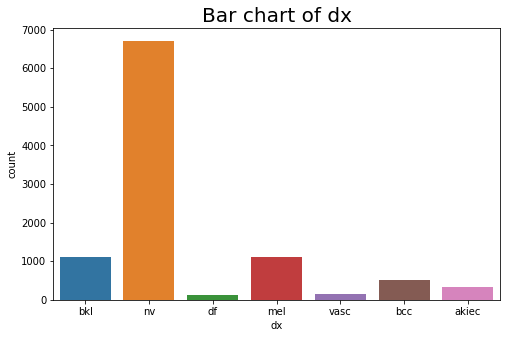

In [53]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='dx',data=data)
plt.title('Bar chart of dx', fontdict={'size': 20})
plt.show

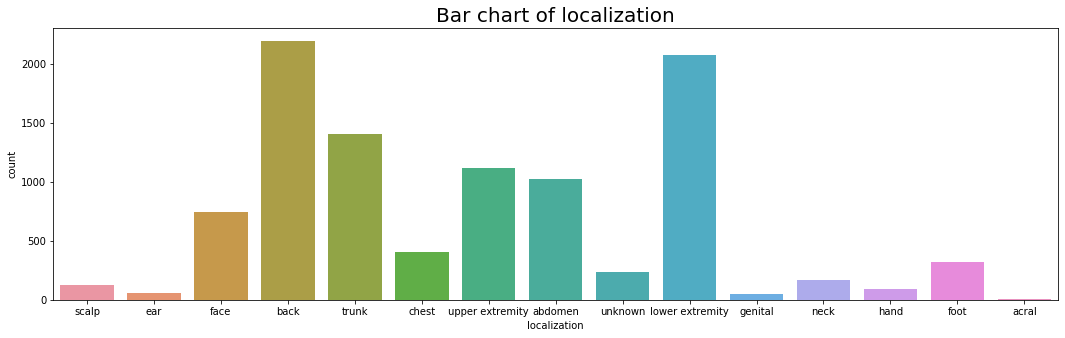

In [37]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='localization',data=data)
plt.title('Bar chart of localization', fontdict={'size': 20})
plt.show()

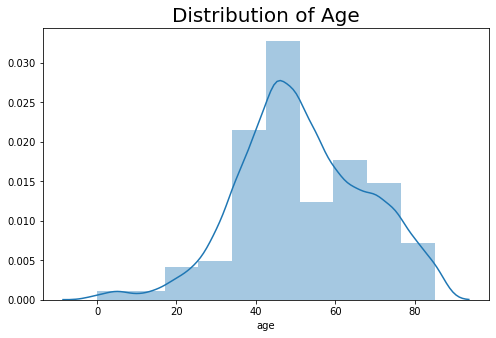

In [62]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data2['age'].dropna().values, 
                  bins=10)
plt.title('Distribution of Age', fontdict={'size': 20})
plt.xlabel('age')
plt.show()

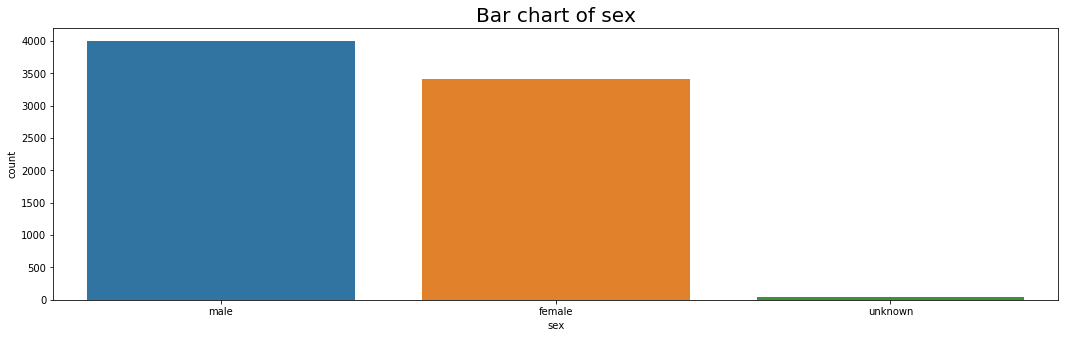

In [63]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='sex',data=data2)
plt.title('Bar chart of sex', fontdict={'size': 20})
plt.show()